<a href="https://colab.research.google.com/github/nandanaraj/My-Works/blob/main/11_MLR_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [ ]:
data = pd.read_csv("C:\\Users\\T0SHIBA\\Documents\\IMS Ankur Sir\\Data Sets\\07 - Multiple LR_50Startups.csv")

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


### Profit : Dependent Variable

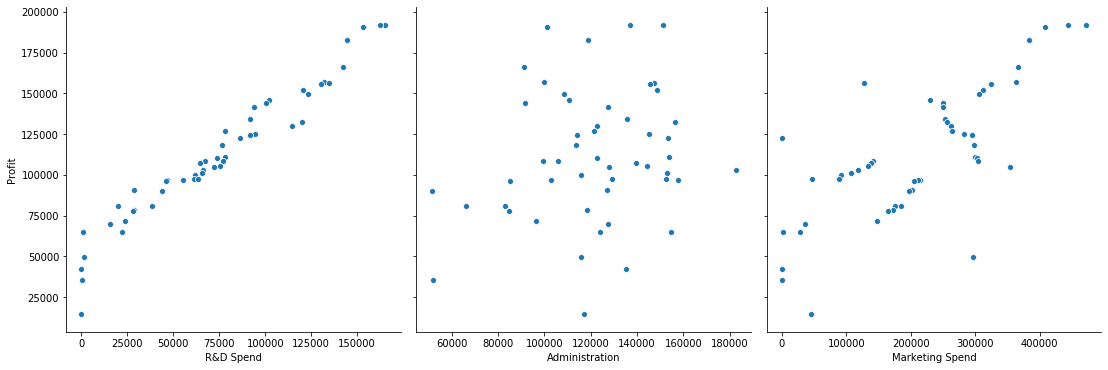

In [ ]:
sns.pairplot(data,x_vars=['R&D Spend','Administration','Marketing Spend'],y_vars=['Profit'],height=5)

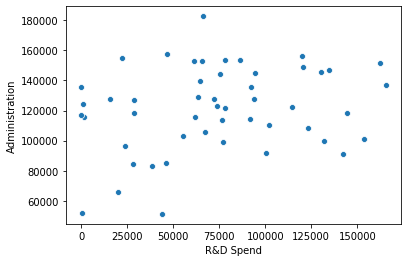

In [ ]:
sns.scatterplot(data=data,x='R&D Spend',y='Administration')

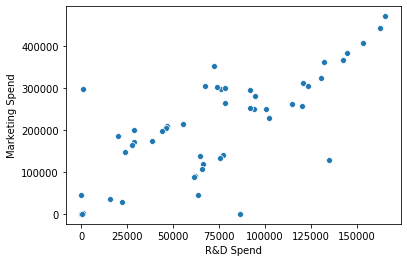

In [ ]:
sns.scatterplot(data=data,x='R&D Spend',y='Marketing Spend')

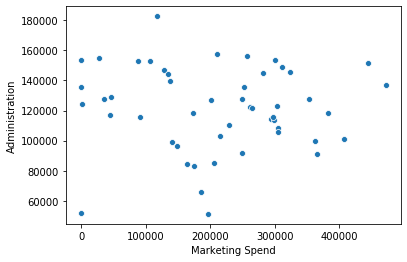

In [ ]:
sns.scatterplot(data=data,x='Marketing Spend',y='Administration')

In [ ]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### There is NO LINEAR RELATIONSHIP between PRICE and ADMINISTRATION
### There is a HIGH CORRELATION between R&D SPEND and MARKETING SPEND

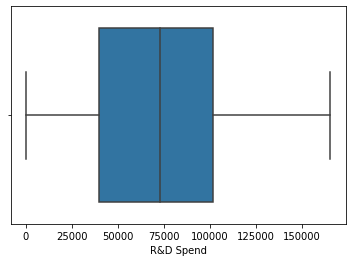

In [ ]:
sns.boxplot(data["R&D Spend"])

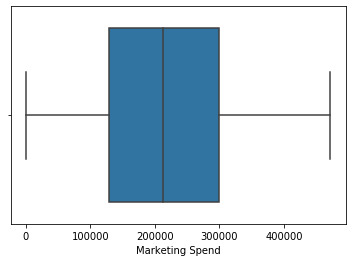

In [ ]:
sns.boxplot(data["Marketing Spend"])

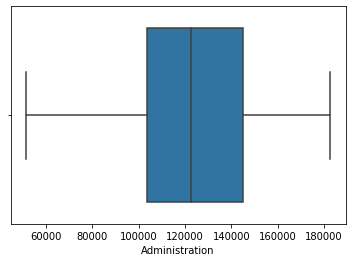

In [ ]:
sns.boxplot(data["Administration"])

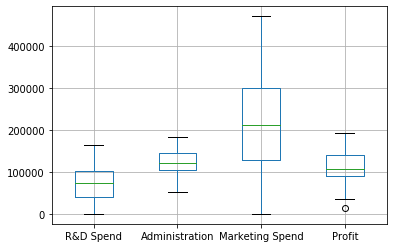

In [ ]:
data.boxplot()

### NO OUTLIERS

# MODEL I

In [ ]:
X=data[['R&D Spend','Administration','Marketing Spend']]

In [ ]:
y=data['Profit']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = lr.predict(X_test)

In [ ]:
lr.coef_

array([0.77884104, 0.0293919 , 0.03471025])

In [ ]:
coefs=pd.DataFrame(lr.coef_,X_test.columns,columns=['Coeffeicient'])
coefs

,Coeffeicient
R&D Spend,0.778841
Administration,0.029392
Marketing Spend,0.034710


In [ ]:
lr.intercept_

42989.00816508666

In [ ]:
rsquared = metrics.r2_score(y_test,y_predict)
rsquared

0.939395591782057

In [ ]:
mse=metrics.mean_squared_error(y_test,y_predict)
mse

77506468.1688541

In [ ]:
rmse=np.sqrt(mse)
rmse

8803.775790469343

In [ ]:
adjusted_r = 1-((1-rsquared)*49)/(50-3-1)
adjusted_r

0.9354431303765389

In [ ]:
vif = pd.DataFrame()
vif['features']=X_test.columns
vif['Vif Factor']=[variance_inflation_factor(X_test.values,i) for i in range (X_test.shape[1])]
vif

,features,Vif Factor
0,R&D Spend,10.844599
1,Administration,3.892729
2,Marketing Spend,10.282672


In [ ]:
df = pd.DataFrame(y_test.values,columns=['Original y_test'])
df.head()

,Original y_test
0,103282.38
1,144259.40
2,146121.95
3,77798.83
4,191050.39


In [ ]:
df['Predicted y_test']= pd.Series(y_predict)
df['Residuals']=df['Original y_test']-df['Predicted y_test']
df.head()


,Original y_test,Predicted y_test,Residuals
0,103282.38,103901.896970,-619.516970
1,144259.40,132763.059931,11496.340069
2,146121.95,133567.903700,12554.046300
3,77798.83,72911.789767,4887.040233
4,191050.39,179627.925672,11422.464328


In [ ]:
durbin_watson(df.Residuals)

1.9859902944461834

# Model II

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data_dummies=pd.get_dummies(data,drop_first=True)

In [ ]:
data_dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [ ]:
data_dummies.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [ ]:
x=data_dummies[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]

In [ ]:
y=data_dummies['Profit']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = lr.predict(x_test)

In [ ]:
lr.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02, -9.59284160e+02,
        6.99369053e+02])

In [ ]:
lr.intercept_

42554.16761773238

In [ ]:
rsquared = metrics.r2_score(y_test,y_predict)
rsquared

0.9347068473282424

In [ ]:
mse=metrics.mean_squared_error(y_test,y_predict)
mse

83502864.03257756

In [ ]:
rmse=np.sqrt(mse)
rmse

9137.990152794955

In [ ]:
adjusted_r = 1-((1-rsquared)*49)/(50-5-1)
adjusted_r

0.92728717088827

In [ ]:
vif = pd.DataFrame()
vif['features']=x_test.columns
vif['Vif Factor']=[variance_inflation_factor(x_test.values,i) for i in range (x_test.shape[1])]
vif

,features,Vif Factor
0,R&D Spend,15.947323
1,Administration,10.670771
2,Marketing Spend,15.839194
3,State_Florida,7.301063
4,State_New York,4.840184


# Model III

In [ ]:
x=data_dummies[[ 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
#we drop R&D Spend because of multicollinearity

In [ ]:
y=data_dummies['Profit']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
print(lr.coef_)
print(lr.intercept_)
rsquared = metrics.r2_score(y_test,y_predict)
print("R square : ",rsquared)
mse=metrics.mean_squared_error(y_test,y_predict)
print("MSE :",mse)
rmse=np.sqrt(mse)
print("RMSE :",rmse)
adjusted_r = 1-((1-rsquared)*49)/(50-4-1)
print("Adjusted r: ",adjusted_r )

[ 4.31762672e-01  2.41493372e-01 -6.21327023e+03  1.00243330e+04]
5399.724170989357
R square :  0.19047672228784374
MSE : 1035292514.2063755
RMSE : 32175.96174485505
Adjusted r:  0.11851909760231871


# Model IV

In [ ]:
x=data_dummies[[ 'Marketing Spend','State_Florida', 'State_New York']] 
#we drop administration since it is dont have linear relatioship 

In [ ]:
y=data_dummies['Profit']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
print(lr.coef_)
print(lr.intercept_)
rsquared = metrics.r2_score(y_test,y_predict)
print("R square : ",rsquared)
mse=metrics.mean_squared_error(y_test,y_predict)
print("MSE :",mse)
rmse=np.sqrt(mse)
print("RMSE :",rmse)
adjusted_r = 1-((1-rsquared)*49)/(50-3-1)
print("Adjusted r: ",adjusted_r )

[ 2.48546403e-01 -5.35319137e+03  9.96063917e+03]
57057.09602420169
R square :  0.328763970981353
MSE : 858438114.4327201
RMSE : 29299.114567384455
Adjusted r:  0.28498770821926744


In [ ]:
vif = pd.DataFrame()
vif['features']=x_test.columns
vif['Vif Factor']=[variance_inflation_factor(x_test.values,i) for i in range (x_test.shape[1])]
vif

,features,Vif Factor
0,Marketing Spend,4.377128
1,State_Florida,3.576015
2,State_New York,1.801113


# Model V

In [ ]:
x=data_dummies[['R&D Spend', 'Marketing Spend','State_Florida', 'State_New York']]

In [ ]:
y=data_dummies['Profit']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
print(lr.coef_)
print(lr.intercept_)
rsquared = metrics.r2_score(y_test,y_predict)
print("R square : ",rsquared)
mse=metrics.mean_squared_error(y_test,y_predict)
print("MSE :",mse)
rmse=np.sqrt(mse)
print("RMSE :",rmse)
adjusted_r = 1-((1-rsquared)*49)/(50-4-1)
print("Adjusted r: ",adjusted_r )

[  0.85127787 483.16069732 179.14817045]
48257.52425340458
R square :  0.947168930401689
MSE : 67565210.75864063
RMSE : 8219.806004927405
Adjusted r:  0.9424728353262836


In [ ]:
vif = pd.DataFrame()
vif['features']=x_test.columns
vif['Vif Factor']=[variance_inflation_factor(x_test.values,i) for i in range (x_test.shape[1])]
vif

,features,Vif Factor
0,R&D Spend,11.496175
1,Marketing Spend,13.796304
2,State_Florida,3.693211
3,State_New York,1.878261


# Model VI

In [ ]:
x=data_dummies[['R&D Spend', 'State_Florida', 'State_New York']]
#we drop marketing spend beacuse it has highest vif accross all models

In [ ]:
y=data_dummies['Profit']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
print(lr.coef_)
print(lr.intercept_)
rsquared = metrics.r2_score(y_test,y_predict)
print("R square : ",rsquared)
mse=metrics.mean_squared_error(y_test,y_predict)
print("MSE :",mse)
rmse=np.sqrt(mse)
print("RMSE :",rmse)
adjusted_r = 1-((1-rsquared)*49)/(50-3-1)
print("Adjusted r: ",adjusted_r )
vif = pd.DataFrame()
vif['features']=x_test.columns
vif['Vif Factor']=[variance_inflation_factor(x_test.values,i) for i in range (x_test.shape[1])]
vif

[  0.85127787 483.16069732 179.14817045]
48257.52425340458
R square :  0.947168930401689
MSE : 67565210.75864063
RMSE : 8219.806004927405
Adjusted r:  0.9437234258626688


,features,Vif Factor
0,R&D Spend,3.647371
1,State_Florida,3.307355
2,State_New York,1.340015


In [ ]:
df = pd.DataFrame(y_test.values,columns=['Original y_test'])
df['Predicted y_test']= pd.Series(y_predict)
df['Residuals']=df['Original y_test']-df['Predicted y_test']
df.head()

,Original y_test,Predicted y_test,Residuals
0,103282.38,104968.882398,-1686.502398
1,144259.40,133957.336222,10302.063778
2,146121.95,135497.034913,10624.915087
3,77798.83,72485.310557,5313.519443
4,191050.39,179362.047197,11688.342803


In [ ]:
durbin_watson(df.Residuals)

1.8536793901589004

### We have to proceed with  modelling trill we satisfy the assumptions ; We need to model till VIF less than 10

In [ ]:
1-((1-0.0351050168)*19)/(20-2-1)

-0.0784120400470587